## Statistical Testing of Hypotheses for the United States Gulf Coast Hurricane Data
### Initial Hypotheses
1. Correlation of number of hurricanes to any of the World Ocean Database features.
2. Correlation of average yearly strength of hurricanes to any of the World Ocean Database features.
3. Coast length correlates with overall number of hurricanes per state.

***

### First load and arrange the necessary datasets

In [1]:
#load the necessary datasets and packages
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from scipy import stats

hurricanes_df = pd.read_csv("C:/Users/sethh/OneDrive/Desktop/Springboard/Capstone Project 1/hurricanes_df.csv", 
                            index_col = 0, parse_dates=True)

wod_df_date = pd.read_csv("C:/Users/sethh/OneDrive/Desktop/Springboard/Capstone Project 1/wod_df_date.csv", 
                          index_col = 0, parse_dates=True)

with open("C:/Users/sethh/OneDrive/Desktop/Springboard/Capstone Project 1/coast_lengths.json") as file:
    coasts_dict = json.load(file)

### 1. Correlation of number of hurricanes to any of the World Ocean Database features.
* Null hypothesis is that the data aren't correlated.
* Create permutation replicates of the wod feature data while holding the hurricane data constant.
* Test statistic is the correlation coefficient.
* p-value is the sum of the correlations at least as extreme as the empirical correlation.

Test for correlation between oxygen and hurricanes.
The empirical correlation coefficient is -0.139.

The 95% confidence interval is -0.2342238416888796 to 0.31408407114219905.
p-val = 0.1558


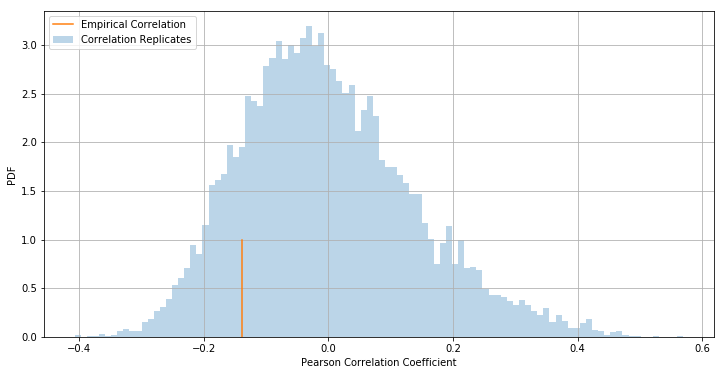

Test for correlation between phosphate and hurricanes.
The empirical correlation coefficient is 0.161.

The 95% confidence interval is -0.15845173041754237 to 0.36098307740971264.
p-val = 0.1059


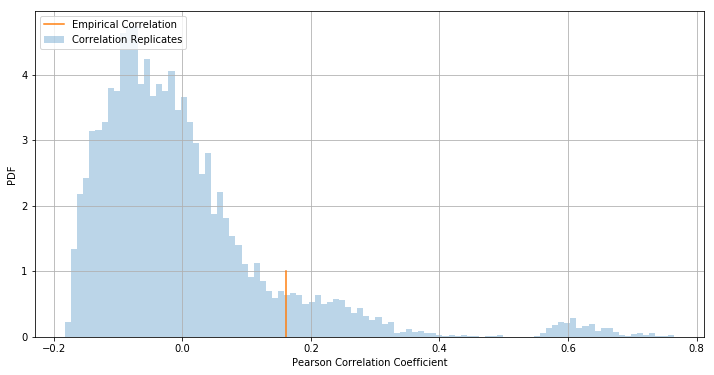

Test for correlation between salinity and hurricanes.
The empirical correlation coefficient is -0.215.

The 95% confidence interval is -0.30139550610952687 to 0.22770901487688405.
p-val = 0.0747


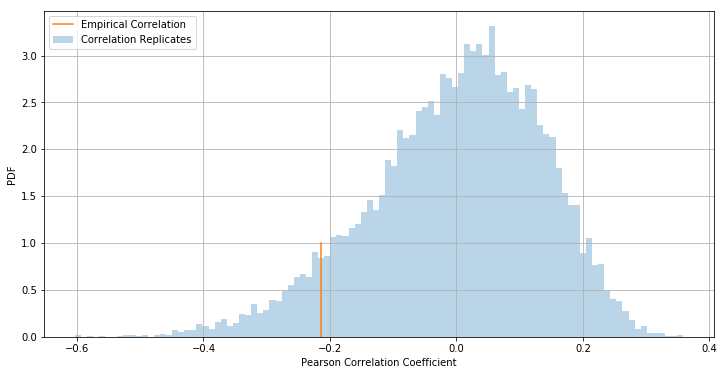

Test for correlation between silicate and hurricanes.
The empirical correlation coefficient is 0.122.

The 95% confidence interval is -0.2022241724959127 to 0.37184079764539113.
p-val = 0.1558


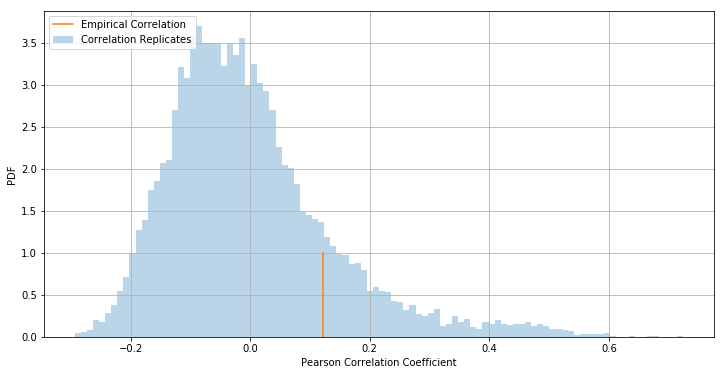

Test for correlation between temperature and hurricanes.
The empirical correlation coefficient is -0.363.

The 95% confidence interval is -0.27977802149568776 to 0.26274584121366684.
p-val = 0.0057


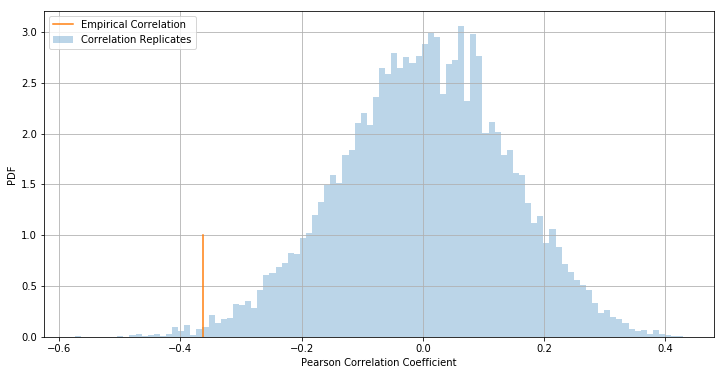

In [2]:
#arrange the wod and hurricane data in the appropriate manner
wod_df_year = wod_df_date.resample('A').mean()
hurricanes_year_df = hurricanes_df.resample('A').count()
hurricanes_year_df = hurricanes_year_df[hurricanes_year_df.index.year <= 2012]

def corr_test(data1, data2, label1, label2, size=1):
    """Runs a permutation test for correlation and generates a p-value, 95% confidence interval, and a histogram."""
    
    #print labels for the particular correlation test
    print("Test for correlation between {} and {}.".format(label1, label2))
    
    #calculate the empirical correlation
    emp_corr = np.corrcoef(data1, data2)[0][1]
    

    print("The empirical correlation coefficient is {}.".format(round(emp_corr,3)))
    print("")

    # Initialize permutation replicates: perm_replicates
    perm_replicates = np.empty(size)

    # Draw replicates
    for i in range(size):
        # Permute data1 measurments
        data1_permuted = np.random.permutation(data1)

        # Compute Pearson correlation
        perm_replicates[i] = np.corrcoef(data1_permuted,data2)[0][1]

    # Compute p-value: p
    if emp_corr < 0:
        p = np.sum(perm_replicates <= emp_corr)/len(perm_replicates)
    else:
        p = np.sum(perm_replicates >= emp_corr)/len(perm_replicates)
        
    print("The 95% confidence interval is {} to {}."
          .format(np.percentile(perm_replicates,2.5),np.percentile(perm_replicates,97.5)))
    print('p-val =', p)

    #make a histogram of the replicate correlations and show where the empirical result lies
    plt.figure(figsize=(12,6))
    pd.Series(perm_replicates).hist(alpha=0.3, normed=True, bins=100)
    plt.plot([emp_corr,emp_corr], [0,1])
    plt.xlabel('Pearson Correlation Coefficient')
    plt.ylabel('PDF')
    plt.legend(['Empirical Correlation','Correlation Replicates'], loc='upper left')
    plt.show()
    
#calculate the statistics for each wod feature
for column in wod_df_year.columns:
    corr_test(wod_df_year[column],hurricanes_year_df.name,label1=column,label2='hurricanes',size=10000)

* The only statistically significant correlation with $\alpha$ = .05 significance level is between temperature and the number of hurricanes.

***

### 2. Correlation of average yearly strength of hurricanes to any of the World Ocean Database features.
* Null hypothesis is that the data aren't correlated.
* Create permutation replicates of the wod feature data while holding the strength data constant.
* Test statistic is the correlation coefficient.
* p-value is the sum of the correlations at least as extreme as the empirical correlation.

Test for correlation between oxygen and strength.
The empirical correlation coefficient is -0.243.

The 95% confidence interval is -0.26476841936710593 to 0.2788214618721647.
p-val = 0.0383


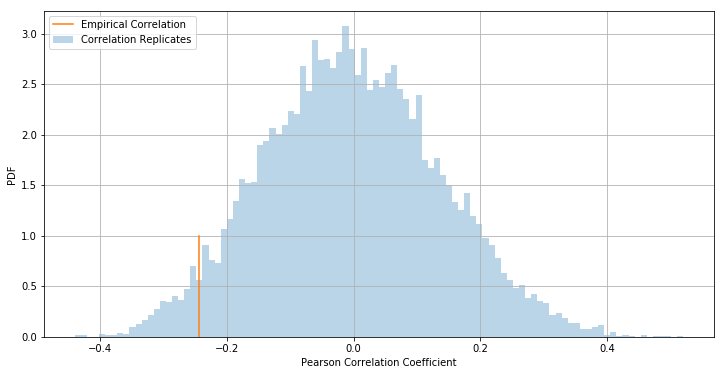

Test for correlation between phosphate and strength.
The empirical correlation coefficient is 0.033.

The 95% confidence interval is -0.2153873304550893 to 0.28423353853295463.
p-val = 0.3819


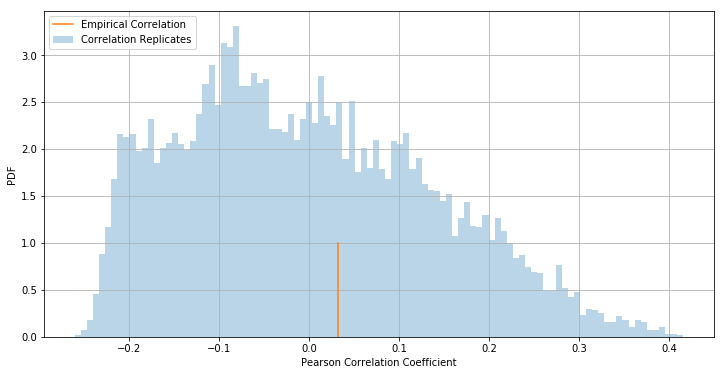

Test for correlation between salinity and strength.
The empirical correlation coefficient is 0.052.

The 95% confidence interval is -0.2781981177002787 to 0.26031477456138913.
p-val = 0.3551


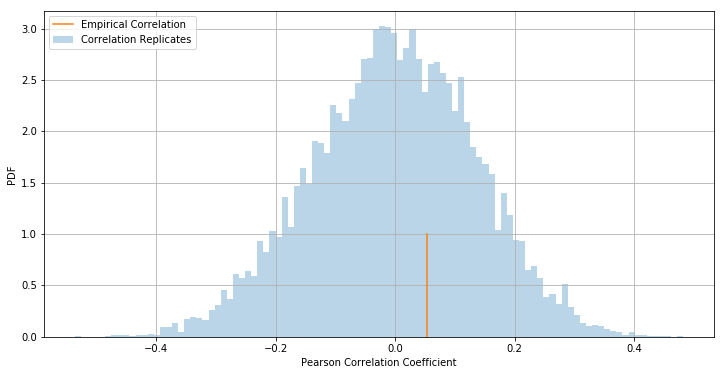

Test for correlation between silicate and strength.
The empirical correlation coefficient is 0.133.

The 95% confidence interval is -0.25559061215709994 to 0.2818081663632105.
p-val = 0.1742


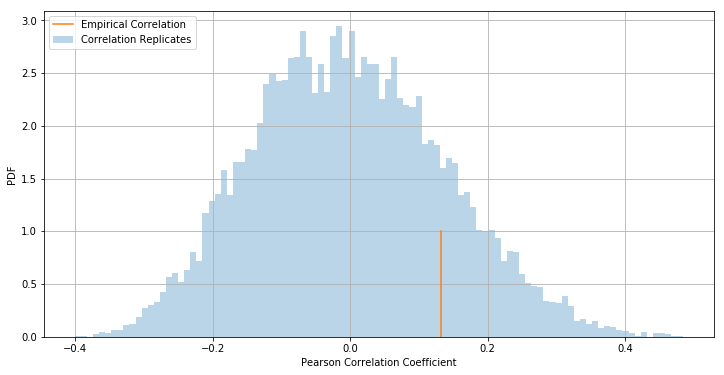

Test for correlation between temperature and strength.
The empirical correlation coefficient is -0.204.

The 95% confidence interval is -0.26991187300289904 to 0.26859748685957663.
p-val = 0.0695


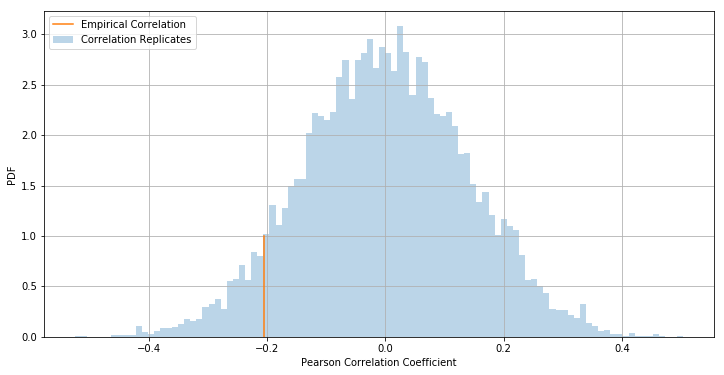

In [3]:
#calculate average strength of hurricanes per year
cat_year = hurricanes_df.resample('A').mean().fillna(0)
cat_year = cat_year[cat_year.index.year <= 2012]
strengths = [arr[0] for arr in cat_year.values]
#run correlation tests
for column in wod_df_year.columns:
    corr_test(wod_df_year[column],strengths,label1=column,label2='strength',size=10000)

* The only statistically significant correlation with $\alpha$ = .05 significance level is between oxygen and the average yearly strength.

***

### 3. Coast length correlates with overall number of hurricanes per state.
* Null hypothesis is that the data aren't correlated.
* Create permutation replicates of the coast length data while holding the number of hurricanes data constant.
* Test statistic is the correlation coefficient.
* p-value is the sum of the correlations at least as extreme as the empirical correlation.

Test for correlation between coast length and hurricane totals.
The empirical correlation coefficient is 0.94.

The 95% confidence interval is -0.8972079554106072 to 0.8859627929398434.
p-val = 0.0064


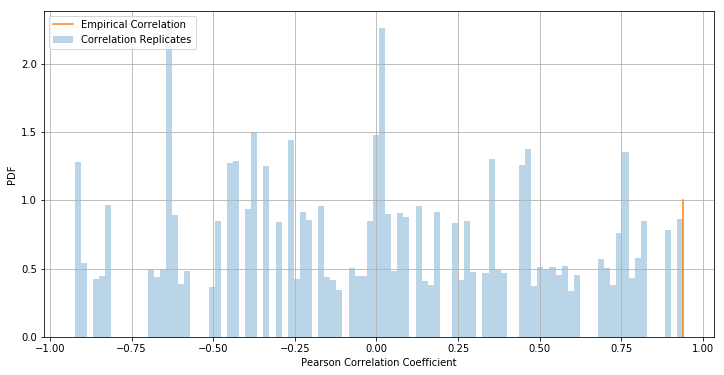

In [4]:
#get hurricanes per state
state_totals = hurricanes_df.groupby(['state']).count()['name'].sort_index()

#sort coast lengths
keys = coasts_dict.keys()
values = coasts_dict.values()
coasts_df = pd.DataFrame(list(zip(keys,values)), columns=['state','coast_length']).set_index('state').sort_index()
lengths = [arr[0] for arr in coasts_df.values]

#run correlation test
corr_test(lengths,state_totals.values,label1='coast length', label2='hurricane totals', size=10000)

* The result is statistically significant with $\alpha$  = .05 significance level.

***

### Additional Hypotheses
* After reviewing the results of the previous test a couple more can be tested to solidify a statistical answer.
* Since temperature and the number of hurricanes were negatively correlated, and oxygen and average strength were negatively correlated:
    * A. Colder yearly average ocean temperatures lead to higher number of hurricanes.
    * B. Lower yearly average ocean oxygen content leads to higher average yearly strength of hurricanes.
    
***

### A. Colder yearly average ocean temperatures lead to higher number of hurricanes.
* Try different group splitting temperature.
* Null hypothesis is that there isn't a difference in means of the two groups.
* Shift high and low temperature data groups to have the same mean.
* Create bootstrap replicates of both groups.
* The test statistic is difference of means.
* p-value is the sum of the replicates that have a difference of means at least as extreme as the empirical difference of means.

count    53.000000
mean     25.128089
std       1.946027
min      19.943430
25%      24.143556
50%      25.223760
75%      26.254823
max      28.900000
Name: temperature, dtype: float64

The group separation temperature is 20.
Low group data points: 1.  High group data points: 52.
The mean number of hurricanes per year with yearly averagre gulf temperature less than 20 is 5.0.

The mean number of hurricanes per year with yearly averagre gulf temperature greater than 20 is 1.4423076923076923.

The empirical difference of means is 3.5576923076923075.

The 95% confidence interval is -4.557692307692308 to 1.4423076923076923.
p-val = 0.0


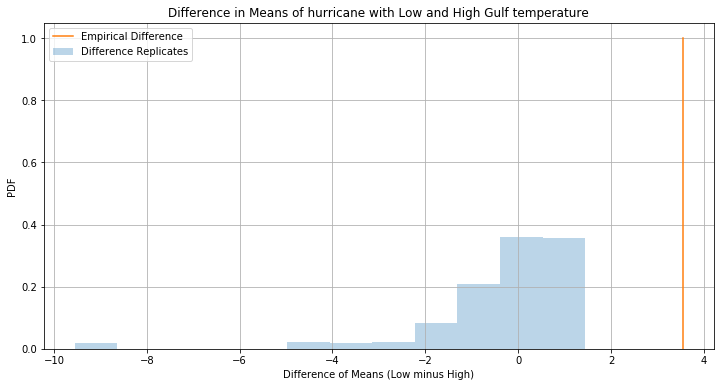


The group separation temperature is 21.
Low group data points: 1.  High group data points: 52.
The mean number of hurricanes per year with yearly averagre gulf temperature less than 21 is 5.0.

The mean number of hurricanes per year with yearly averagre gulf temperature greater than 21 is 1.4423076923076923.

The empirical difference of means is 3.5576923076923075.

The 95% confidence interval is -4.557692307692308 to 1.4423076923076923.
p-val = 0.0


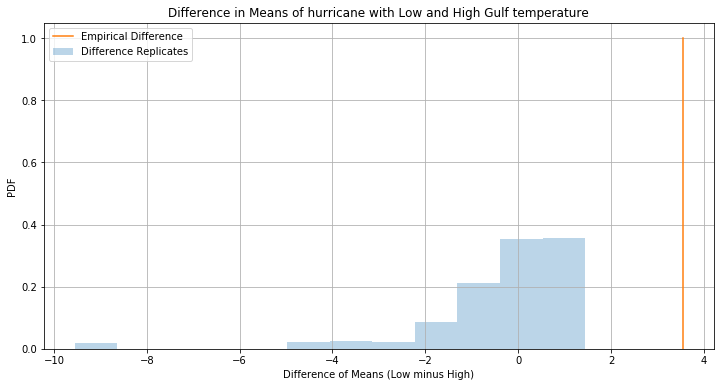


The group separation temperature is 22.
Low group data points: 4.  High group data points: 49.
The mean number of hurricanes per year with yearly averagre gulf temperature less than 22 is 4.5.

The mean number of hurricanes per year with yearly averagre gulf temperature greater than 22 is 1.2653061224489797.

The empirical difference of means is 3.2346938775510203.

The 95% confidence interval is -6.23469387755102 to 7.76530612244898.
p-val = 0.2448


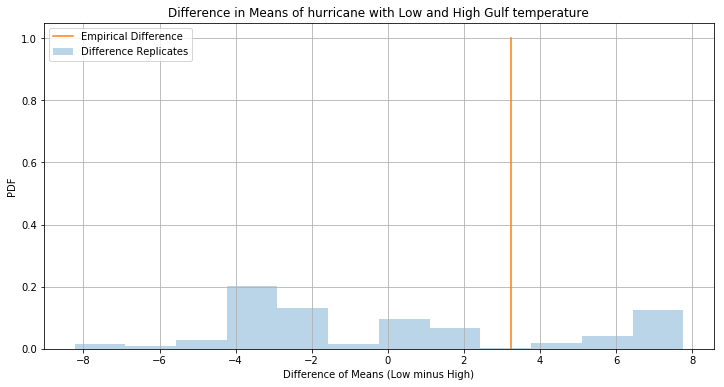


The group separation temperature is 23.
Low group data points: 7.  High group data points: 46.
The mean number of hurricanes per year with yearly averagre gulf temperature less than 23 is 2.857142857142857.

The mean number of hurricanes per year with yearly averagre gulf temperature greater than 23 is 1.3043478260869565.

The empirical difference of means is 1.5527950310559007.

The 95% confidence interval is -5.552795031055901 to 9.4472049689441.
p-val = 0.2221


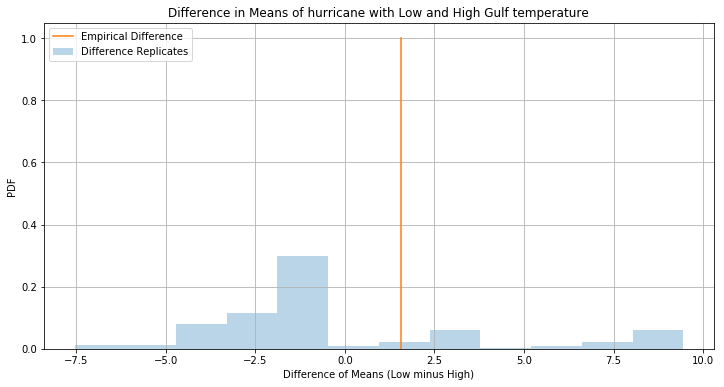


The group separation temperature is 24.
Low group data points: 13.  High group data points: 40.
The mean number of hurricanes per year with yearly averagre gulf temperature less than 24 is 2.1538461538461537.

The mean number of hurricanes per year with yearly averagre gulf temperature greater than 24 is 1.3.

The empirical difference of means is 0.8538461538461537.

The 95% confidence interval is -4.853846153846154 to 10.146153846153846.
p-val = 0.2557


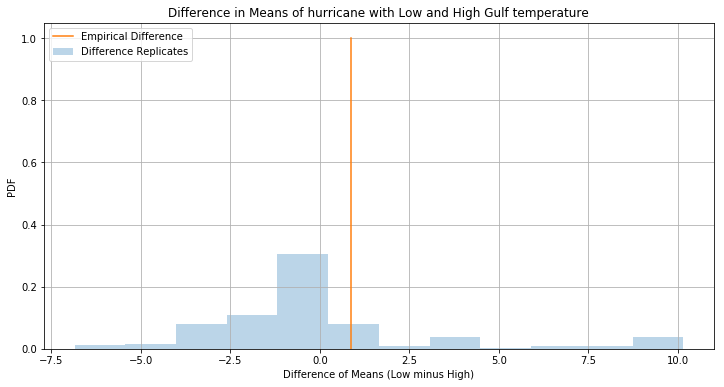


The group separation temperature is 25.
Low group data points: 25.  High group data points: 28.
The mean number of hurricanes per year with yearly averagre gulf temperature less than 25 is 2.12.

The mean number of hurricanes per year with yearly averagre gulf temperature greater than 25 is 0.9642857142857143.

The empirical difference of means is 1.1557142857142857.

The 95% confidence interval is -5.155714285714286 to 8.844285714285713.
p-val = 0.175


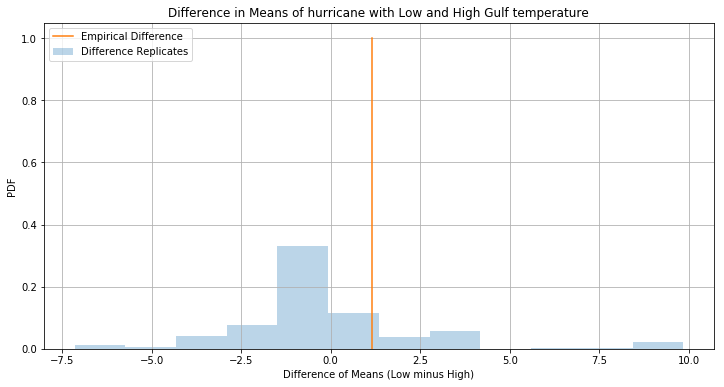


The group separation temperature is 26.
Low group data points: 36.  High group data points: 17.
The mean number of hurricanes per year with yearly averagre gulf temperature less than 26 is 1.8888888888888888.

The mean number of hurricanes per year with yearly averagre gulf temperature greater than 26 is 0.7058823529411765.

The empirical difference of means is 1.1830065359477122.

The 95% confidence interval is -3.183006535947712 to 7.8169934640522865.
p-val = 0.178


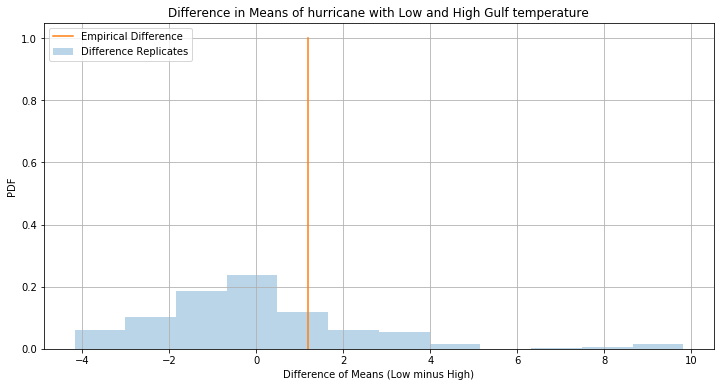


The group separation temperature is 27.
Low group data points: 45.  High group data points: 8.
The mean number of hurricanes per year with yearly averagre gulf temperature less than 27 is 1.6444444444444444.

The mean number of hurricanes per year with yearly averagre gulf temperature greater than 27 is 0.75.

The empirical difference of means is 0.8944444444444444.

The 95% confidence interval is -3.8944444444444444 to 5.105555555555556.
p-val = 0.2788


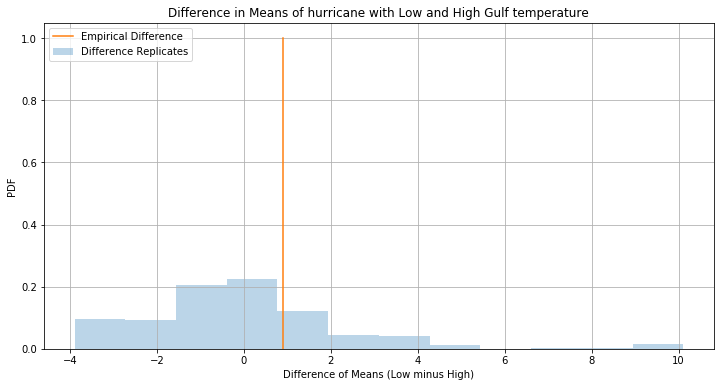

In [5]:
#decide on group splitting temperature
print(wod_df_year.temperature.describe())
print('')

#will try the 99th percentile range of temperatures for the dividing temperature

def diff_of_means(data1,data2):
    """Generates difference in proportions of greater than 1 of two datasets."""
    
    return np.mean(data1) - np.mean(data2)
    
def bs_rep_draw(data1,data2,func,size):
    """Generates permutation replicates of desired size and function."""
    
    # Initialize bootstrap replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Draw replicates
    for i in range(size):
        
        # Permute data and split into sets
        bs1 = np.random.choice(data1)
        bs2 = np.random.choice(data2)

        # Compute replicate with function from data low and high
        bs_replicates[i] = func(bs1,bs2)
    return bs_replicates

def run_test(divide, param, dataset='hurricane'):
    #set up test parameters
    years_low = wod_df_year[wod_df_year[param] < divide].index
    years_high = wod_df_year[wod_df_year[param] >= divide].index
    
    if dataset == 'hurricane':
        shifted_mean = np.mean(np.concatenate((hurricanes_year_df.loc[years_low].name,hurricanes_year_df.loc[years_high].name)))
        low_data = hurricanes_year_df.loc[years_low].name - np.mean(hurricanes_year_df.loc[years_low].name) + shifted_mean
        high_data = hurricanes_year_df.loc[years_high].name - np.mean(hurricanes_year_df.loc[years_high].name) + shifted_mean
    
        print("Low group data points: {}.  High group data points: {}.".format(low_data.size, high_data.size))

        #empirical difference of proportions
        emp_diff_mean = diff_of_means(hurricanes_year_df.loc[years_low].name, hurricanes_year_df.loc[years_high].name)
        print("The mean number of hurricanes per year with yearly averagre gulf temperature less than {} is {}."
              .format(divide, hurricanes_year_df.loc[years_low].name.mean()))
        print('')
        print("The mean number of hurricanes per year with yearly averagre gulf temperature greater than {} is {}."
              .format(divide, hurricanes_year_df.loc[years_high].name.mean()))
        print('')
        print('The empirical difference of means is {}.'.format(emp_diff_mean))
        print('')
    else:
        low_cat = cat_year.loc[years_low]
        high_cat = cat_year.loc[years_high]
        low_strength = [arr[0] for arr in low_cat.values]
        high_strength = [arr[0] for arr in high_cat.values]
        
        shifted_mean = np.mean(np.concatenate((low_strength, high_strength)))
        
        low_data = low_strength - np.mean(low_strength) + shifted_mean
        high_data = high_strength - np.mean(high_strength) + shifted_mean
    
        print("Low group data points: {}.  High group data points: {}.".format(low_data.size, high_data.size))

        #empirical difference of proportions
        emp_diff_mean = diff_of_means(low_strength, high_strength)
        print("The mean number of hurricanes per year with yearly averagre gulf oxygen less than {} is {}."
              .format(divide, np.mean(low_strength)))
        print('')
        print("The mean number of hurricanes per year with yearly averagre gulf oxygen greater than {} is {}."
          .format(divide, np.mean(high_strength)))
        print('')
        print('The empirical difference of means is {}.'.format(emp_diff_mean))
        print('')
        
    #generate the replicates
    bs_replicates = bs_rep_draw(low_data, 
                                high_data, 
                                diff_of_means, 10000)
        
    # Compute p-value: p
    if emp_diff_mean > 0:
        p = np.sum(bs_replicates >= emp_diff_mean)/len(bs_replicates)
    else:
        p = np.sum(bs_replicates <= emp_diff_mean)/len(bs_replicates)
    print("The 95% confidence interval is {} to {}.".format(np.percentile(bs_replicates,2.5),np.percentile(bs_replicates,97.5)))
    print('p-val =', p)

    #make a histogram of the replicate correlations and show where the empirical result lies
    plt.figure(figsize=(12,6))
    pd.Series(bs_replicates).hist(alpha=0.3, normed=True, bins=12)
    plt.plot([emp_diff_mean,emp_diff_mean], [0,1])
    plt.title('Difference in Means of ' + dataset + ' with Low and High Gulf '+param)
    plt.ylabel('PDF')
    plt.xlabel('Difference of Means (Low minus High)')
    plt.legend(['Empirical Difference','Difference Replicates'], loc='upper left')
    plt.show()
    
for i in range(int(np.percentile(wod_df_year.temperature,0.5)),int(np.percentile(wod_df_year.temperature,99.5))):
    print("The group separation temperature is {}.".format(i))
   
    run_test(i,'temperature')
    print('')

* The only result with significance is when the separation temperature is 21 $^\circ$C.  The data is skewed beyond divide temperatures of 25 and 26 because of one group having very little data points.  No statistical inferences can be made from the tests.  More data may help to give significant results.

In [6]:
for i in range(20,28):
    
    print("The group separation temperature is {}.".format(i))
    #set up test parameters
    years_low = wod_df_year[wod_df_year.temperature < i].index
    years_high = wod_df_year[wod_df_year.temperature >= i].index

    
    print(stats.ttest_ind(hurricanes_year_df.loc[years_low].name,hurricanes_year_df.loc[years_high].name, equal_var=False))
    print('')

The group separation temperature is 20.
Ttest_indResult(statistic=nan, pvalue=nan)

The group separation temperature is 21.
Ttest_indResult(statistic=nan, pvalue=nan)

The group separation temperature is 22.
Ttest_indResult(statistic=1.364302398408769, pvalue=0.26466503519773271)

The group separation temperature is 23.
Ttest_indResult(statistic=1.0344451699523791, pvalue=0.33939065838487331)

The group separation temperature is 24.
Ttest_indResult(statistic=0.99912190030820991, pvalue=0.33479037370880704)

The group separation temperature is 25.
Ttest_indResult(statistic=2.1873485650833326, pvalue=0.035001630346955394)

The group separation temperature is 26.
Ttest_indResult(statistic=2.7364225762239482, pvalue=0.0085272233164261548)

The group separation temperature is 27.
Ttest_indResult(statistic=1.7517627883910571, pvalue=0.099187852669728016)



C:\Users\sethh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3146: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\sethh\Anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\sethh\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\sethh\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\sethh\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


* After tryin t-tests, the results are similar with significance at the extreme temperature range separations.  So, temperatures less than 21 and greater than 25 as the divding points give significant results (p-value < 0.05).  I would say more data is needed before making any conclusions.  The low and high data group respectively have very few data points.
* It still stands that there is a statistically significant negative correlation between the temperature and number of hurricanes.
* A good dividing temperature that would signify a statistically higher chance of hurricanes is hard to discern with the limited amount of data.

***

### B. Lower yearly average ocean oxygen content leads to higher average yearly strength of hurricanes.
* Try different group splitting oxygen content values.
* Null hypothesis is that there isn't a difference in means of the two groups.
* Shift high and low oxygen content data groups to have the same mean.
* Create bootstrap replicates of both groups.
* The test statistic is difference of means.
* p-value is the sum of the replicates that have a difference of means at least as extreme as the empirical difference of means.

count    53.000000
mean      5.088377
std       0.679331
min       4.086905
25%       4.677047
50%       4.884682
75%       5.383590
max       7.212206
Name: oxygen, dtype: float64


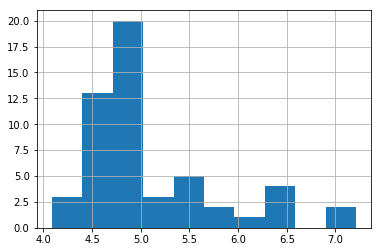

In [7]:
#the oxygen data is heavily right skewed
print(wod_df_year.oxygen.describe())
wod_df_year.oxygen.hist()
plt.show()

The group separation oxygen content is 4.384682301668369.
Low group data points: 3.  High group data points: 50.
The mean number of hurricanes per year with yearly averagre gulf oxygen less than 4.384682301668369 is 0.3333333333333333.

The mean number of hurricanes per year with yearly averagre gulf oxygen greater than 4.384682301668369 is 1.3983333333333332.

The empirical difference of means is -1.065.

The 95% confidence interval is -2.9349999999999996 to 2.0649999999999995.
p-val = 0.19


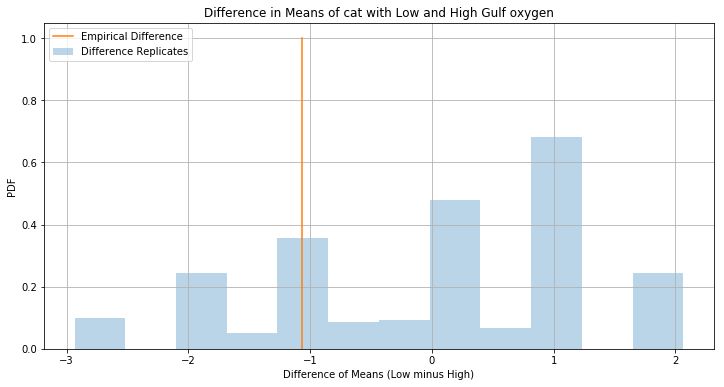


The group separation oxygen content is 4.884682301668369.
Low group data points: 26.  High group data points: 27.
The mean number of hurricanes per year with yearly averagre gulf oxygen less than 4.884682301668369 is 1.7051282051282048.

The mean number of hurricanes per year with yearly averagre gulf oxygen greater than 4.884682301668369 is 0.9845679012345679.

The empirical difference of means is 0.7205603038936369.

The 95% confidence interval is -2.970560303893637 to 2.9461063627730297.
p-val = 0.3583


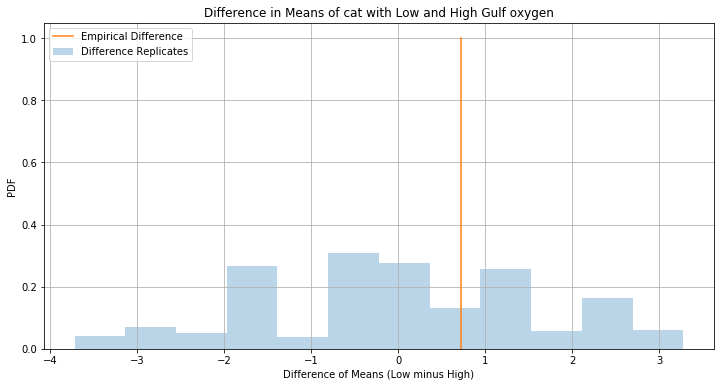


The group separation oxygen content is 5.384682301668369.
Low group data points: 40.  High group data points: 13.
The mean number of hurricanes per year with yearly averagre gulf oxygen less than 5.384682301668369 is 1.525.

The mean number of hurricanes per year with yearly averagre gulf oxygen greater than 5.384682301668369 is 0.7628205128205128.

The empirical difference of means is 0.7621794871794871.

The 95% confidence interval is -3.012179487179487 to 3.237820512820513.
p-val = 0.3093


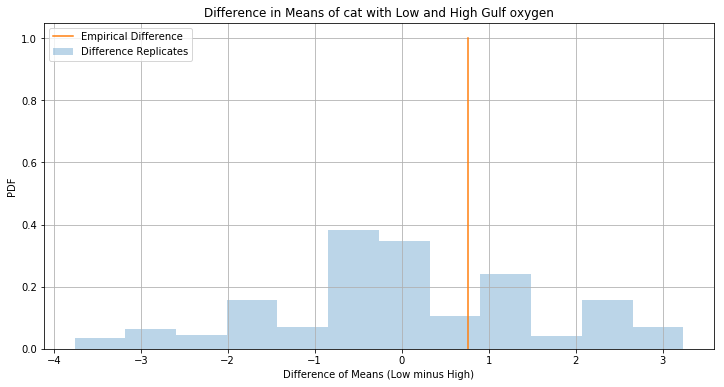

In [8]:
#run tests for oxygen groupings
for i in np.arange(wod_df_year.oxygen.median()-.5,wod_df_year.oxygen.median()+1,0.5):
    print("The group separation oxygen content is {}.".format(i))
    run_test(i, 'oxygen', dataset='cat')
    print('')

* None of the oxygen level group tests are significant.  I believe this once again suffers from too few data points.

***

* Try t-tests:

In [9]:
for i in np.arange(wod_df_year.oxygen.median()-.5,wod_df_year.oxygen.median()+1,0.5):
    
    print("The group separation oxygen content is {}.".format(i))
    #set up test parameters
    years_low = wod_df_year[wod_df_year.oxygen < i].index
    years_high = wod_df_year[wod_df_year.oxygen >= i].index
    
    low_cat = cat_year.loc[years_low]
    high_cat = cat_year.loc[years_high]
    low_strength = [arr[0] for arr in low_cat.values]
    high_strength = [arr[0] for arr in high_cat.values]
    
    print(stats.ttest_ind(low_strength, high_strength, equal_var=False))
    print('')

The group separation oxygen content is 4.384682301668369.
Ttest_indResult(statistic=-2.8382248232525309, pvalue=0.060902384049852189)

The group separation oxygen content is 4.884682301668369.
Ttest_indResult(statistic=2.2253067774194228, pvalue=0.031379158336112559)

The group separation oxygen content is 5.384682301668369.
Ttest_indResult(statistic=2.2351322049289588, pvalue=0.034780915918108515)



* The t-tests show significant results if the median of the oxygen content is used as the group divider suggesting that there might be a chance of more hurricanes if the oxygen content in the gulf is low.
* However the data may not exactly meet the conditions of the t-test, so the results must be taken with a grain of salt.  I would say more data points would aid in a more significant conclusion.
* However, a significant negative correlation does exist between the yearly average oxygen content of the gulf and the average strength of the hurricanes.

### Summary
* There is a significant negative correlation between the yearly average gulf temperature and the yearly number of hurricanes affecting the gulf coast.
* Also, there is a significant negative correlation between the yearly average oxygen content of the gulf and the yearly average strength of the hurricanes that affect the gulf coast.
* No significant dividing temperature or oxygen content could be found with available data to give a boundary for higher chance of hurricanes and/or higher strengths for the year.